# Expirments with dense layers using the fashion MNIST dataset

In [0]:
# following https://classroom.udacity.com/courses/ud187/lessons/e52f6e56-2fbc-4ba8-9f74-377937b7da5c/concepts/69c86393-9b29-4875-b0b6-68b1d3cef4ed


In [4]:
!pip install -U tensorflow_datasets
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import tensorflow as tf
# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (3.1.0)


In [5]:
dataset, metadata = tfds.load('fashion_mnist',
                              as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteCH7IA1/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteCH7IA1/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

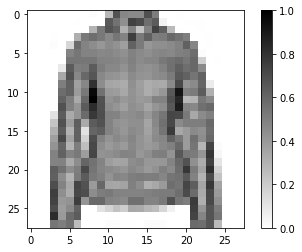

In [8]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

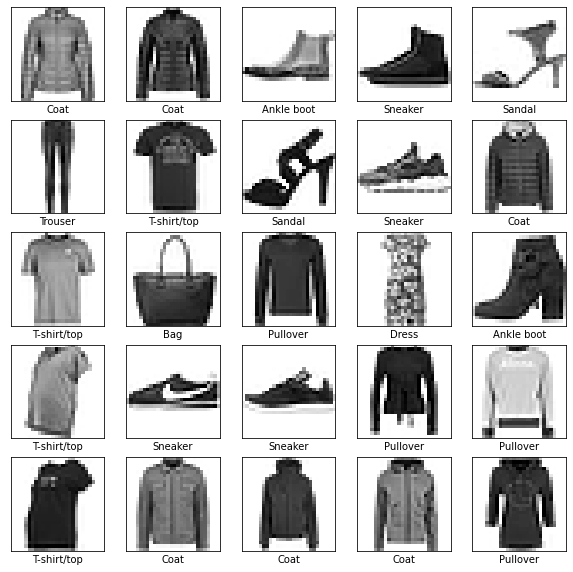

In [9]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

This will me model 1, model2 will expirement with different params

In [0]:
# caching the data is makes training FASTER! than just getting it fromm disk as usual
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [12]:
# The epochs=5 parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4976 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3720 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3116 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8920


In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3701 - accuracy: 0.8681
Accuracy on test dataset: 0.8680999875068665


Above is model1, now we expirement with model 2 that has more neurons and see that the difference is not that big 

In [16]:
dense_layer_neurons = 1000
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model2.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
test_loss, test_accuracy = model2.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset for model2:', test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4666 - accuracy: 0.8320
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3538 - accuracy: 0.8706
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3193 - accuracy: 0.8826
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8883
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8806
Accuracy on test dataset for model2: 0.8805999755859375


Next, model3 with 10 neurons in the middle dense layer

In [19]:
dense_layer_neurons = 10
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model3.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
test_loss, test_accuracy = model3.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset for model3:', test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6351 - accuracy: 0.7866
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4666 - accuracy: 0.8370
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4430 - accuracy: 0.8446
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4336 - accuracy: 0.8482
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4580 - accuracy: 0.8409
Accuracy on test dataset for model3: 0.8409000039100647


Huh not that much of a diffrence with only 10 neuronss... lets try model4 with 5 neurons

In [20]:
dense_layer_neurons = 5
model4= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model4.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
test_loss, test_accuracy = model4.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset for model4:', test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8507 - accuracy: 0.7132
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5399 - accuracy: 0.8145
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5112 - accuracy: 0.8227
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4975 - accuracy: 0.8296
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5190 - accuracy: 0.8232
Accuracy on test dataset for model4: 0.823199987411499


Okay so turns out the num_neurons isn't a big factor, so lets try adding more layers  and see if that changes accuracy a lot

In [21]:
dense_layer_neurons = 1000
model_more_layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_more_layers.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model_more_layers.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
test_loss, test_accuracy = model_more_layers.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset for model_more_layers:', test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4618 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3548 - accuracy: 0.8704
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3184 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.8918
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3669 - accuracy: 0.8641
Accuracy on test dataset for model_more_layers: 0.8640999794006348


In [22]:
#hmmm last time we did one extra layer, this time lets do more!

dense_layer_neurons = 1000
model_more_layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
        tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
     tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
        tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_more_layers.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model_more_layers.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
test_loss, test_accuracy = model_more_layers.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset for model_more_layers:', test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6876 - accuracy: 0.7393
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5169 - accuracy: 0.8216
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4209 - accuracy: 0.8528
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4028 - accuracy: 0.8605
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.8341
Accuracy on test dataset for model_more_layers: 0.8341000080108643


oookay hhumm not much change there, maybe increasing epochs? but lets do that another time now let's make predictions!

In [26]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

print(predictions.shape)
print(predictions[0])
print("If the following two numbers match then the model made the correcct prediction")
print(np.argmax(predictions[0]))
print(test_labels[0])


(32, 10)
[6.7795077e-06 1.6525470e-06 2.3147266e-03 3.9497382e-07 9.9258089e-01
 4.8944555e-09 5.0600478e-03 1.0933225e-08 3.5488425e-05 2.1520082e-10]
If the following two numbers match then the model made the correcct prediction
4
4


In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

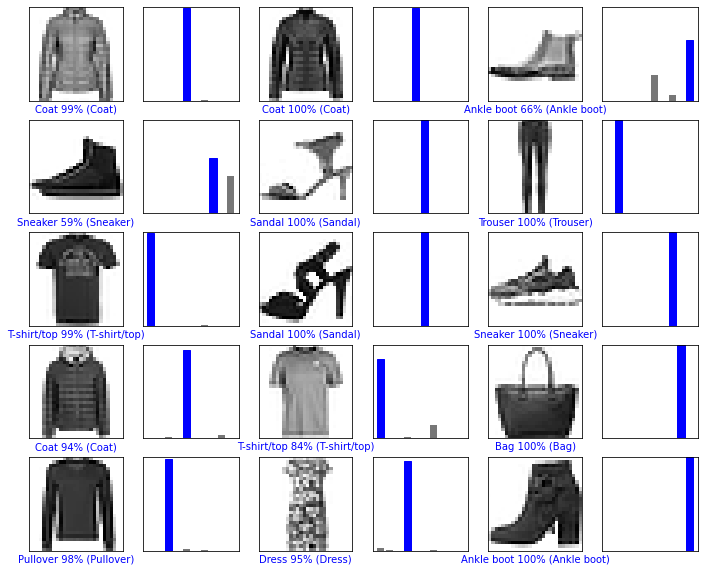

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

(28, 28, 1)
(1, 28, 28, 1)
[[6.7795008e-06 1.6525470e-06 2.3147266e-03 3.9497348e-07 9.9258089e-01
  4.8944555e-09 5.0600455e-03 1.0933245e-08 3.5488356e-05 2.1520041e-10]]
4


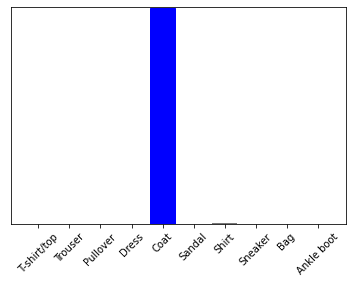

In [35]:
# single image prediction

# Grab an image from the test dataset
img = test_images[0]
# plt.imshow(img,  cmap=plt.cm.binary)
print(img.shape)

# Add the image to a batch where it's the only member. cuz keras wants that
img = np.array([img])

print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print(np.argmax(predictions_single[0]))